<a href="https://colab.research.google.com/github/sclaudiobr/covid2019/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet - previsão de dados com framework prophet

## Formato de dados e colunas
<p> datas (ds)
<p> variável (y)

*por: Claudio R. O da Silva*

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [0]:
#covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')
covid = pd.read_csv('https://raw.githubusercontent.com/sclaudiobr/covid2019/master/covid_19_data.csv')
#covid = pd.read_csv('https://raw.githubusercontent.com/sclaudiobr/covid2019/master/brazil_covid19_210320.csv')

In [3]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,2020-03-30 22:58:55,94.0,0.0,0.0
10354,10355,03/30/2020,Xinjiang,Mainland China,2020-03-30 22:58:55,76.0,3.0,73.0
10355,10356,03/30/2020,Yukon,Canada,2020-03-30 22:58:55,4.0,0.0,0.0
10356,10357,03/30/2020,Yunnan,Mainland China,2020-03-30 22:58:55,180.0,2.0,172.0
10357,10358,03/30/2020,Zhejiang,Mainland China,2020-03-30 22:58:55,1255.0,1.0,1225.0


In [0]:
covid.rename(columns ={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [5]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,2020-03-30 22:58:55,94.0,0.0,0.0
10354,10355,03/30/2020,Xinjiang,Mainland China,2020-03-30 22:58:55,76.0,3.0,73.0
10355,10356,03/30/2020,Yukon,Canada,2020-03-30 22:58:55,4.0,0.0,0.0
10356,10357,03/30/2020,Yunnan,Mainland China,2020-03-30 22:58:55,180.0,2.0,172.0
10357,10358,03/30/2020,Zhejiang,Mainland China,2020-03-30 22:58:55,1255.0,1.0,1225.0


In [0]:
from datetime import datetime as dt

In [0]:
# numero de mortes
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()
mortes['Date'] = pd.to_datetime(mortes['Date'])

In [0]:
confirmados = covid.groupby('Date').sum()['Confirmed'].reset_index()
confirmados.tail()
confirmados['Date'] = pd.to_datetime(confirmados['Date'])

In [0]:
confirmados.columns = ['ds','y']

In [11]:
# tratamento dos dados para o prophet - renomeando
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
64,2020-03-26,23970.0
65,2020-03-27,27198.0
66,2020-03-28,30652.0
67,2020-03-29,33925.0
68,2020-03-30,37582.0


In [12]:
confirmados['ds'] = pd.to_datetime(confirmados['ds'])
confirmados.tail()

,ds,y
64,2020-03-26,529591.0
65,2020-03-27,593291.0
66,2020-03-28,660706.0
67,2020-03-29,720117.0
68,2020-03-30,782365.0


In [13]:
# formatando data
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
64,2020-03-26,23970.0
65,2020-03-27,27198.0
66,2020-03-28,30652.0
67,2020-03-29,33925.0
68,2020-03-30,37582.0


In [22]:
dias = 90
m = Prophet(interval_width= 0.95)
m.fit(confirmados)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# uso do prophet
dias = 30
m = Prophet(interval_width= 0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#futuro.tail(dias)

In [0]:
previsao = m.predict(futuro)
#previsao.tail(dias)

In [24]:
previsao[['ds', 'yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
69,2020-03-31,7.008769e+05,7.380156e+05,7.789714e+05
70,2020-04-01,7.416217e+05,7.777820e+05,8.141110e+05
71,2020-04-02,7.800434e+05,8.194014e+05,8.598682e+05
72,2020-04-03,8.227707e+05,8.619723e+05,9.021577e+05
73,2020-04-04,8.643069e+05,9.043273e+05,9.450689e+05
...,...,...,...,...
154,2020-06-24,3.003045e+06,4.141266e+06,5.267108e+06
155,2020-06-25,3.041591e+06,4.182886e+06,5.321868e+06
156,2020-06-26,3.044485e+06,4.225456e+06,5.396505e+06
157,2020-06-27,3.075521e+06,4.267811e+06,5.446000e+06


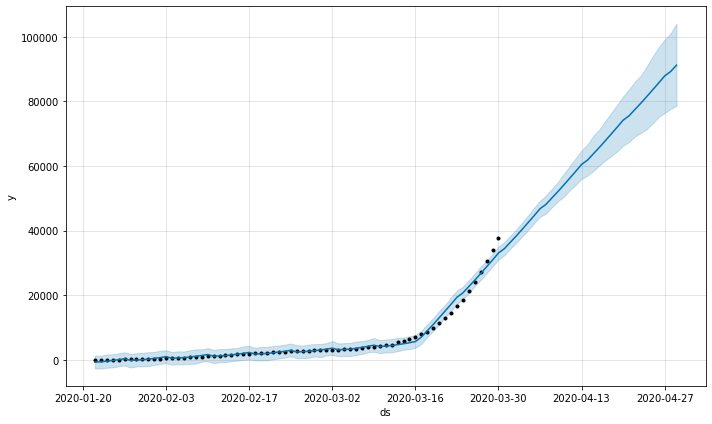

In [19]:
confirmed_forecast_plot = m.plot(previsao)

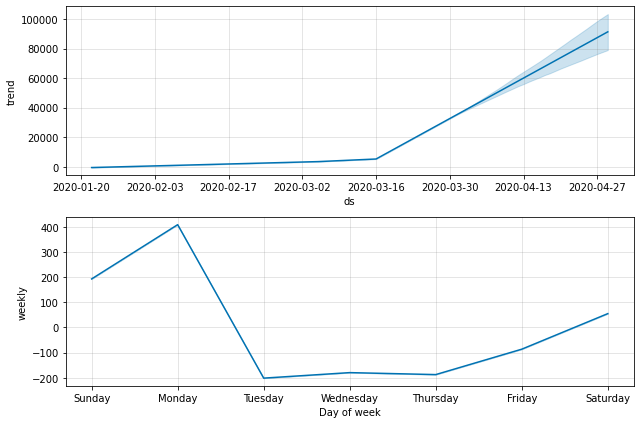

In [20]:
fig2 = m.plot_components(previsao)

In [21]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

NameError: ignored